# Project 3: Logistic Regression

 **Meenakshi Nerolu**       $\hspace{18cm}$    **December 8, 2019**

# 1. Introduction

Logistic Regression is a mathematical model used in statistics to estimate the probability of an event occurring having been given some previous data. Logistic Regression works with binary data. In general, a binary logistic regression describes the relationship between the dependent binary variable and one or more independent variable/s.

The binary dependent variable has two possible out comes:

'1' for true/success ; or

'0' for false/failure.

This database is chosen from https://www.kaggle.com/primaryobjects/voicegender#voice.csv. It is created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers.

The acoustic properties of the voice and speech can be used to detect gender of speaker. Human has natural capability of identifying the difference but when it comes to computer we need to teach it by providing inputs, methodology or different training data and make it learn. In this project, the focus is on training computer to identify the gender based on input of acoustic attributes using various Machine Learning algorithms and get the best results. The most common means of communication is speech signal. The recorded speech can serve as our input to the system. The system processes this speech signal to get acoustic attributes.

The following acoustic properties of each voice are measured and included within the CSV:

* **meanfreq**: mean frequency (in kHz)
* **sd**: standard deviation of frequency
* **median**: median frequency (in kHz)
* **Q25**: first quantile (in kHz)
* **Q75**: third quantile (in kHz)
* **IQR**: interquantile range (in kHz)
* **skew**: skewness (see note in specprop description)
* **kurt**: kurtosis (see note in specprop description)
* **sp.ent**: spectral entropy
* **sfm**: spectral flatness
* **mode**: mode frequency
* **centroid**: frequency centroid (see specprop)
* **peakf**: peak frequency (frequency with highest energy)
* **meanfun**: average of fundamental frequency measured across acoustic signal
* **minfun**: minimum fundamental frequency measured across acoustic signal
* **maxfun**: maximum fundamental frequency measured across acoustic signal
* **meandom**: average of dominant frequency measured across acoustic signal
* **mindom**: minimum of dominant frequency measured across acoustic signal
* **maxdom**: maximum of dominant frequency measured across acoustic signal
* **dfrange**: range of dominant frequency measured across acoustic signal
* **modindx**: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental   frequencies divided by the frequency range
* **label**: male or female

# 2. Prepare and wrangle data with Pandas and Numpy

## Importing all required libraries

In [1]:
# Python Libraries and Packages
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading csv file :

In [3]:
#data frame from csv file 
voice = pd.read_csv("voice.csv")
print("Dimension of the data set is :", voice.shape)

Dimension of the data set is : (3168, 21)


In [4]:
# Making new data frame with dropped NA values
voice_new=voice.dropna()
# dimension of the new dataframe
print("Dimension of the new data set is :", voice_new.shape)

Dimension of the new data set is : (3168, 21)


In [5]:
voice=voice.rename(columns={"label": "gender"})
voice.head(3)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,gender
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male


In [6]:
voice.gender[voice.gender == 'male'] = 1
voice.gender[voice.gender == 'female'] = 0 
voice.gender =  voice.gender.astype("float").astype("int")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# 3. EDA principles and the Matplotlib / Seaborn packages to visualize the data

### Visualizing the correlation among the features

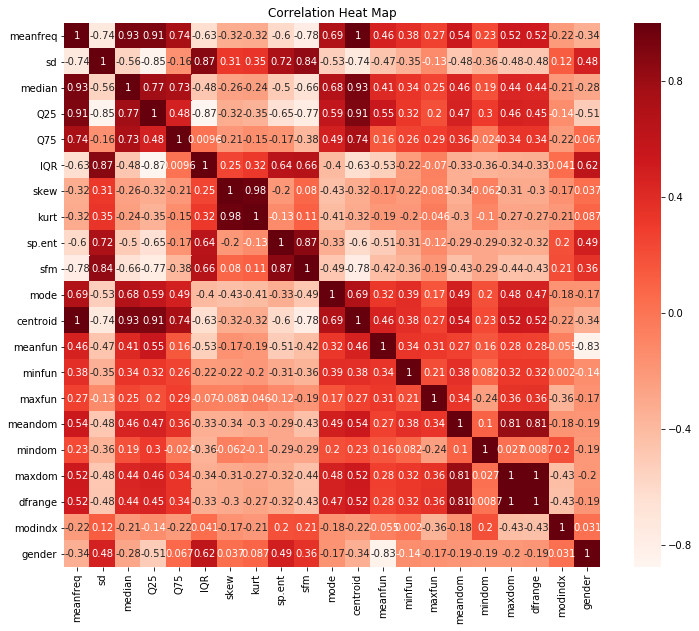

In [7]:
features = voice.loc[:,voice.columns != 'gender']
#corrmat=features.corr(method='pearson')
corrmat=voice.corr(method='pearson')
#plotting the correlation coefficients on a seasborn heatmap matrix
fig, ax = plt.subplots(figsize=(12,10))
#sns.heatmap(corrmat,linewidths=.5,linecolor='black')
sns.heatmap(corrmat, annot=True, cmap=plt.cm.Reds)
plt.title('Correlation Heat Map')
plt.show()

In [ ]:
#sns.pairplot(voice)

In [ ]:
#print(voice.corr())

In [ ]:
#voice = voice.astype(int) 
#print(voice.dtypes) 

# 3. EDA principles and the Matplotlib / Seaborn packages to visualize the data. 

Graph plotting was done to visually show the importance and variances of the attributes. Blue and red represent the plot of male and female respectively.

### Graph plot of acoustic properties (visualizing importance) 

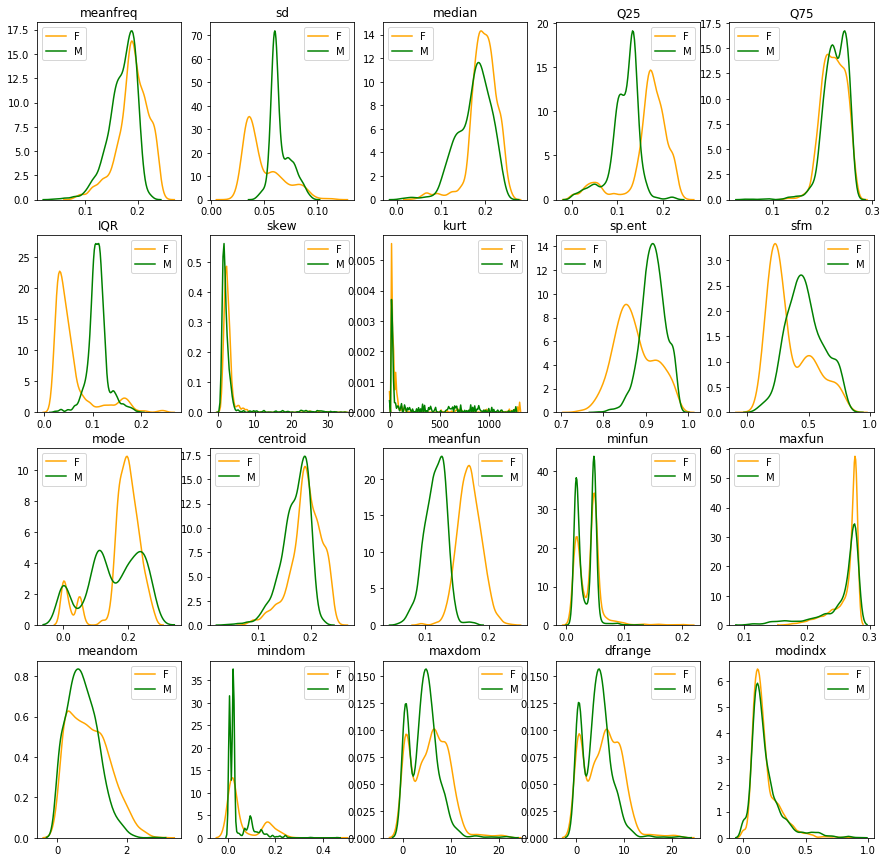

In [8]:
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['gender'] == 0, voice.columns[i-1]], color= 'orange', label='F')
    sns.kdeplot(voice.loc[voice['gender'] == 1, voice.columns[i-1]], color= 'green', label='M')

From the aboe plot, we can observe that most significant features are **meanfun, IQR, Q25, sd and sp.ent**. In this project I will will build models by using the 20 features and the 5 distinct features.

# 4. Scikit-learn logistic regression to train, test and predict a categorical target        variable

In [9]:
import sklearn as sk
import sklearn.metrics
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection

#### Selectiong Feature and Target variables

Here, you need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [10]:
# split dataset in features and target variable

#features = voice.loc[:,voice.columns != 'gender']
#target = voice.loc[:,voice.columns == 'gender']
features = np.array(voice.drop(['gender'], 1))
target = np.array(voice['gender'])

#### Splitting Data

Let's split dataset by using function *train_test_split()*.

In [11]:
#Dividing the data randomly into training and test set
X_train, X_test, y_train, y_test = train_test_split(features,target, 
                                                    test_size=0.2,random_state=0)

After splitting the data, 75% data will be used for model training and 25% for model testing.

In [12]:
print ('Shape of X:', features.shape)
print ('Shape of y:', target.shape)
print ('Shape of X_train:', X_train.shape)
print ('Shape of y_train:', y_train.shape)
print ('Shape of X_test:', X_test.shape)
print ('Shape of y_test:', y_test.shape)

Shape of X: (3168, 20)
Shape of y: (3168,)
Shape of X_train: (2534, 20)
Shape of y_train: (2534,)
Shape of X_test: (634, 20)
Shape of y_test: (634,)


#### Model Development and Prediction

First, import the Logistic Regression module and create a Logistic Regression classifier object using *LogisticRegression()* function.

Then, fit your model on the train set using *fit()* and perform prediction on the test set using *predict()*.

In [13]:
# import the class
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()
## fit the model with data
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
print('Accuracy1 :',logmodel.score(X_train,y_train))
print('Accuracy2 :',logmodel.score(X_test,y_test))

Accuracy1 : 0.909629044988161
Accuracy2 : 0.9148264984227129


#### Model Evaluation using Confusion Matrix

In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       301
           1       0.88      0.97      0.92       333

    accuracy                           0.91       634
   macro avg       0.92      0.91      0.91       634
weighted avg       0.92      0.91      0.91       634

[[257  44]
 [ 10 323]]
0.9148264984227129


#### Visualization of Confusion Matrix using Heatmap

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In the confusion matrix, the diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.

Fro this confusion matrix, we can compute accuracy as follows: 

i.e., Accuracy = $\dfrac{TP+TN}{Total} = \dfrac{ 3.1 * 10^2 + 2.7 * 10^2}{2.7 * 10^2 + 3.1 * 10^2+4+45} = 0.923$

In [16]:
import sklearn.metrics as metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.9148264984227129
Precision: 0.8801089918256131


Here we can observe that,

Accuracy is 91% which is considred as good accuracy.

Precision is about being precise, i.e., how accurate your model is and we can see that model os 96% accurate.

In [17]:
col_names=['gender','meanfun','IQR', 'Q25','sd', 'sp.ent']
voice_new = voice[col_names]
features_new = np.array(voice_new.drop(['gender'], 1))
target_new = np.array(voice_new['gender'])
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(features_new,target_new, 
                                                    test_size=0.2,random_state=0)

In [18]:
print ('Shape of X:', features_new.shape)
print ('Shape of y:', target_new.shape)
print ('Shape of X_train:', X_train_new.shape)
print ('Shape of y_train:', y_train_new.shape)
print ('Shape of X_test:', X_test_new.shape)
print ('Shape of y_test:', y_test_new.shape)

Shape of X: (3168, 5)
Shape of y: (3168,)
Shape of X_train: (2534, 5)
Shape of y_train: (2534,)
Shape of X_test: (634, 5)
Shape of y_test: (634,)


In [19]:
logmodel_new=LogisticRegression()
## fit the model with data
logmodel_new.fit(X_train_new, y_train_new)
y_pred_new = logmodel_new.predict(X_test_new)
print('Accuracy1 :',logmodel_new.score(X_train_new,y_train_new))
print('Accuracy2 :',logmodel_new.score(X_test_new,y_test_new))

Accuracy1 : 0.9072612470402526
Accuracy2 : 0.9211356466876972


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 5. Predict the classes of the test data. Predict the class probability of the test        data

In this project, we use binary classification. For binary classification, we are interested in classifying data into one of two binary groups - these are usually represented as 0's and 1's in our data.

In [20]:
y_prob = logmodel.predict_proba(X_test)

In [21]:
# print the first 10 predicted responses
# 1D array (vector) of binary values (0, 1)
print(y_pred[0:10])
print(y_test[0:10])

[0 1 0 0 1 1 1 0 1 0]
[0 1 0 0 1 1 0 0 1 0]


In [22]:
# print the first 10 predicted probabilities of class membership
y_prob[0:10]

array([[0.70859082, 0.29140918],
       [0.2887516 , 0.7112484 ],
       [0.93790942, 0.06209058],
       [0.75331774, 0.24668226],
       [0.28739521, 0.71260479],
       [0.35056495, 0.64943505],
       [0.39316297, 0.60683703],
       [0.78310911, 0.21689089],
       [0.2098644 , 0.7901356 ],
       [0.87305773, 0.12694227]])

From the above matrix, we can observe that sum of each row is 1. 

Logistic regression predicts the probability of a binary outcome. A new observation is predicted to be within the class if its probability is above a set threshold. 

If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.

Each of the features also has a label of only 0 or 1. Logistic regression is a linear classifier and therefore used when there is some sort of linear relationship between the data.

In [23]:
# print the first 10 predicted probabilities for class 1
y_prob[0:10, 1]

array([0.29140918, 0.7112484 , 0.06209058, 0.24668226, 0.71260479,
       0.64943505, 0.60683703, 0.21689089, 0.7901356 , 0.12694227])

In [24]:
# store the predicted probabilities for class 1
y_pred_prob = y_prob[:, 1]

In [25]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12

Text(0, 0.5, 'Frequency')

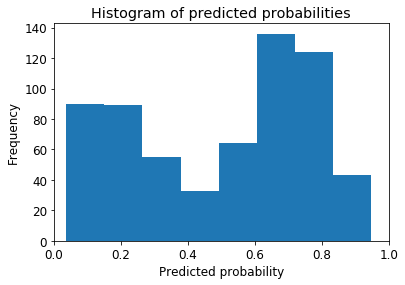

In [26]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')

# 6. Compare one versus all and one versus one

In [27]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
OVR = OneVsRestClassifier(logmodel).fit(X_train, y_train)
OVO = OneVsOneClassifier(logmodel).fit(X_train, y_train)
print( 'One vs rest accuracy: %.3f' % OVR.score(X_test,y_test) )
print( 'One vs one accuracy: %.3f' % OVO.score(X_test,y_test) )

One vs rest accuracy: 0.915
One vs one accuracy: 0.915


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
OVR.fit(X_train, y_train)
pred = OVR.predict_proba(X_test)
pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[0.70859082, 0.29140918],
       [0.2887516 , 0.7112484 ],
       [0.93790942, 0.06209058],
       ...,
       [0.25490655, 0.74509345],
       [0.74387005, 0.25612995],
       [0.85583951, 0.14416049]])

# 7. Interpretition the result of the logistic regression prediction

In [29]:
logmodel.coef_

array([[-3.73671962e-01,  1.48146425e+00, -8.45944080e-01,
        -5.14558502e+00,  3.14031087e+00,  8.28589589e+00,
        -3.73533734e-01,  1.05317167e-02,  4.55475328e+00,
        -4.74164721e-01,  6.20947701e-01, -3.73671962e-01,
        -1.70302767e+01,  1.52817651e-01, -2.54323936e+00,
        -7.84634528e-02, -8.72424364e-01, -4.59785029e-01,
         4.12639335e-01, -8.04394116e-01]])

In [30]:
logmodel.intercept_

array([-0.15283283])

### Receiver Operating Characteristic (ROC) curve

Area Under Curve-ROC (AUC–ROC) curve is the model selection metric for bi–multi class classification problem. ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. ROC tells us how good the model is for distinguishing the given classes, in terms of the predicted probability.

In [31]:
# use the link :https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
y_pred_proba = logmodel.predict_proba(X_test)[:,1]

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
auc= metrics.auc(fpr,tpr)
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label="ROC, auc="+str(auc))
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

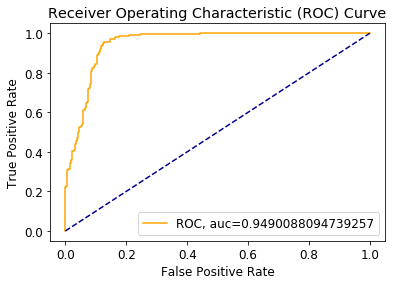

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plot_roc_curve(fpr, tpr)

The area covered by the curve is the area between the orange line (ROC) and the axis. This area covered is AUC. The bigger the area covered, the better the machine learning models is at distinguishing the given classes. Ideal value for AUC is 1.



In [48]:
#from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
#bc = BinaryClassification(y_test, y_pred_proba, labels=["Class 1", "Class 2"])

#Figures
#plt.figure(figsize=(5,5))
#bc.plot_roc_curve()
#plt.show()
#import scikitplot as skplt
#skplt.metrics.plot_ks_statistic(y_test, y_pred_proba)
#plt.show()

### Imporatance of the attributes in recongnising voice using scikit learn

In [49]:
from sklearn.feature_selection import SelectKBest, f_classif

def select_kbest_clf(data_frame, target, k=5):
    """
    Selecting K-Best features for classification
    :param data_frame: A pandas dataFrame with the training data
    :param target: target variable name in DataFrame
    :param k: desired number of features from the data
    :returns feature_scores: scores for each feature in the data as 
    pandas DataFrame
    """
    feat_selector = SelectKBest(f_classif, k=k)
    _ = feat_selector.fit(data_frame.drop(target, axis=1), data_frame[target])
    
    feat_scores = pd.DataFrame()
    feat_scores["F Score"] = feat_selector.scores_
    feat_scores["Attribute"] = data_frame.drop(target, axis=1).columns
    
    return feat_scores
k=select_kbest_clf(voice, 'gender', k=5).sort_values(['F Score'],ascending=False)

Text(0.5, 1.0, 'Feature Importance')

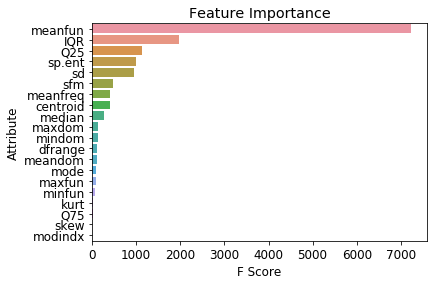

In [50]:
k1=sns.barplot(x=k['F Score'],y=k['Attribute'])
k1.set_title('Feature Importance')

In this project, I have covered logistic model to identfy the voice as male or female. In the next project I will explain more about decision tree to analyze this project.